In [58]:
#imports for data analysis and wrangling
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning

#Train_test_split
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#accuracy score
from sklearn.metrics import accuracy_score, f1_score

#confusion matrix and classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#Importing data
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(heart.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [7]:
#Summary statistics of the features
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


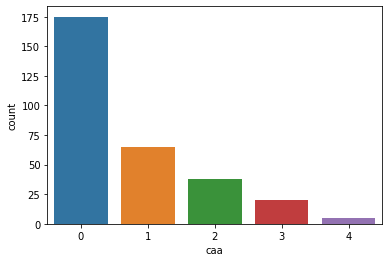

In [8]:
#Checking the most common occurrence in caa
sns.countplot(x = "caa", data = heart)
plt.show()

In [16]:
heart['caa'].value_counts()

0    175
1     65
2     38
3     20
Name: caa, dtype: int64

In [15]:
heart = heart.drop(heart[heart['caa'] == 4].index)

In [17]:
heart['thall'].value_counts()

2    163
3    115
1     18
0      2
Name: thall, dtype: int64

In [18]:
heart = heart.drop(heart[heart['thall'] == 0].index)

In [19]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
heart_visual = heart.copy()

In [21]:
#Changing the values of heart for visual purposes
heart_visual['sex'] = heart_visual['sex'].replace({0:'Female', 1:'Male'})
heart_visual['cp'] = heart_visual['cp'].replace({0:"Asymptomatic",1:'Typical Angina', 
                                   2:'Atypical Angina', 3: "Non-Anginal Pain"})
heart_visual['fbs'] = heart_visual['fbs'].replace({0:"False", 1:"True"})
heart_visual['restecg'] = heart_visual['restecg'].replace({0: "Hypertrophy",1:"Normal", 
                                             2:"ST-T Wave Abnormality"})
heart_visual['exng'] = heart_visual['exng'].replace({0:"No", 1:"Yes"})
heart_visual['slp'] = heart_visual['slp'].replace({0: "downsloping", 1: "flat", 2: "upsloping"})
heart_visual['thall'] = heart_visual['thall'].replace({1:"Fixed Defect", 2: "Normal", 3:"Reversible Defect"})
heart_visual["output"] = heart_visual["output"].replace({0:"Not Prone", 1: "Prone to Having a Heart Disease"})

#Viewing heart dataframe
heart_visual.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,Non-Anginal Pain,145,233,True,Hypertrophy,150,No,2.3,downsloping,0,Fixed Defect,Prone to Having a Heart Disease
1,37,Male,Atypical Angina,130,250,False,Normal,187,No,3.5,downsloping,0,Normal,Prone to Having a Heart Disease
2,41,Female,Typical Angina,130,204,False,Hypertrophy,172,No,1.4,upsloping,0,Normal,Prone to Having a Heart Disease
3,56,Male,Typical Angina,120,236,False,Normal,178,No,0.8,upsloping,0,Normal,Prone to Having a Heart Disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,upsloping,0,Normal,Prone to Having a Heart Disease


In [22]:
def setup(title,axnum):
    """ Creates a plotting space for at most 8 subplots including a title on the upper left
    Args:
        title: The title of your plotting space
        axnum: The number of axes in your plotting space"""
    
    #Setting up the plotting space
    fig = plt.figure(figsize=(18,15))
    gs = fig.add_gridspec(3,3)
    gs.update(wspace=0.5, hspace=0.25)
    ax0 = fig.add_subplot(gs[0,0])

    # Title of the plot 
    ax0.spines["bottom"].set_visible(False)
    ax0.spines["left"].set_visible(False)
    ax0.spines["top"].set_visible(False)
    ax0.spines["right"].set_visible(False)
    ax0.tick_params(left=False, bottom=False)
    ax0.set_xticklabels([])
    ax0.set_yticklabels([])
    ax0.text(0.5,0.5,
          title,
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='monospace',
         color="#ffffff")
    ax0.set_facecolor("#000000")
    # overall background color
    fig.patch.set_facecolor("#000000") 
    
    if axnum is 1:
        global ax1
        ax1 = fig.add_subplot(gs[0,1])
    if axnum is 2:
        global ax2
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
    if axnum is 3:
        global ax3
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
    if axnum is 4:
        global ax4
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
    if axnum is 5:
        global ax5
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2]) 
    if axnum is 6:
        global ax6
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
    if axnum is 7:
        global ax7
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
        ax7 = fig.add_subplot(gs[2,1])
    if axnum is 8:
        global ax8
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
        ax7 = fig.add_subplot(gs[2,1])
        ax8 = fig.add_subplot(gs[2,2])

In [43]:
def plot(ax,sns,var1,var2,x,y,title):
    """ Creates a seaborn subplot based on the axes it was assigned to.
    Args:
        ax: The ax where the data will be plotted
        sns: Type of seaborn plot to be used
        var1: X variable to be considered in the seaborn plot
        var2: Y variable to be considered in the seaborn plot
        x: x-coordinate of the placement of the title in the plotting space
        y: y-coordinate of the placement of the title in the plotting space
        title: title of the subplot"""
    ax.text(x,y,title, fontsize=14, fontweight='bold', fontfamily='monospace', color="#ffffff")
    ax.grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns(ax=ax,x = var1, y = var2, data=heart_visual,hue = 'output',palette=["#ff6961","#aec6cf"])
    ax.set_xlabel("")
    ax.set_ylabel("")
    # ax.spines[("top","right","left")].set_visible(False) # removes the square margins in the graph
    ax.set_facecolor("#000000") #background color of the graph
    
    #Changing the color of x ticks and y ticks
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

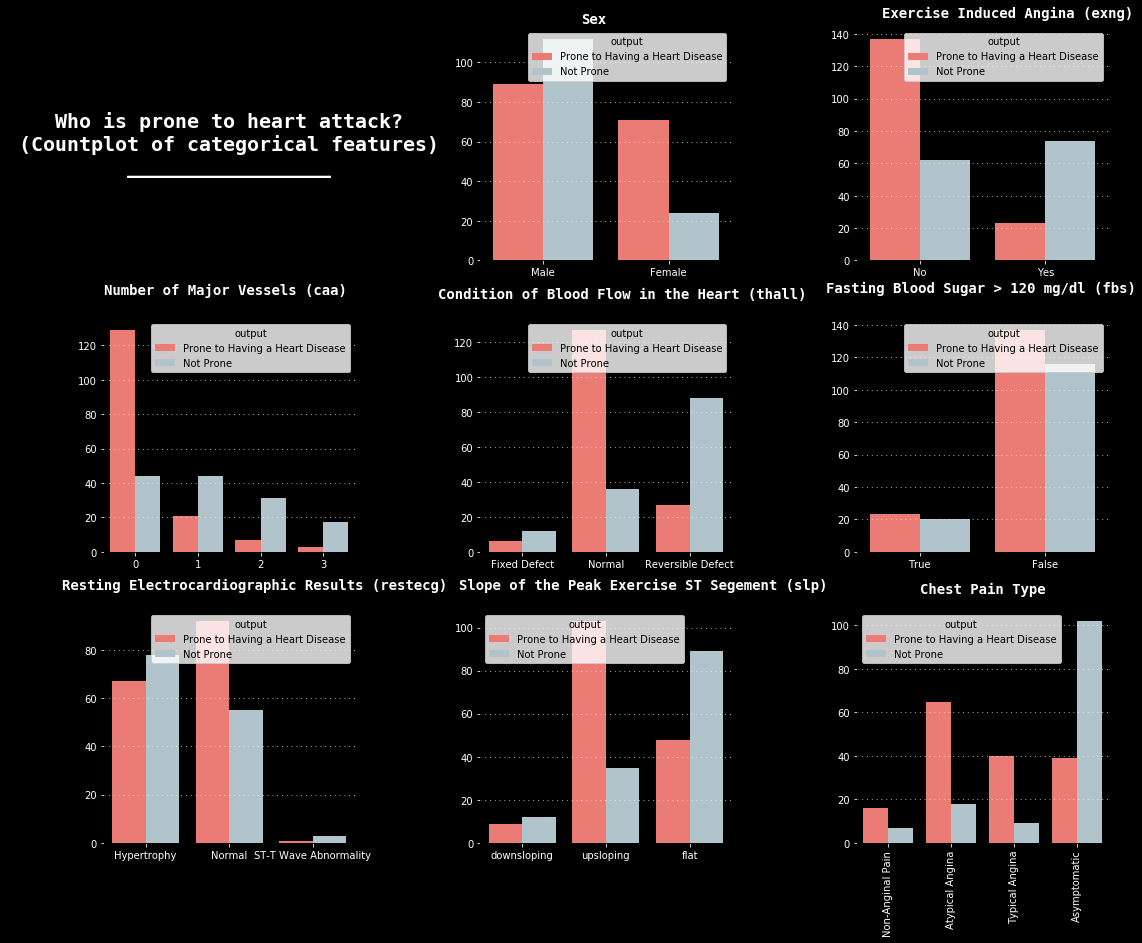

In [39]:
setup('Who is prone to heart attack?\n (Countplot of categorical features) \n_________________',8)

#Count plots
plot(ax1,sns.countplot,'sex',None,0.3,120,'Sex')
plot(ax2,sns.countplot,'exng',None,-0.3,150, 'Exercise Induced Angina (exng)')
plot(ax3,sns.countplot,'caa',None,-0.5,150, 'Number of Major Vessels (caa)')
plot(ax4,sns.countplot,'thall',None,-1,145, 'Condition of Blood Flow in the Heart (thall)')
plot(ax5,sns.countplot,'fbs',None,-0.75,160,'Fasting Blood Sugar > 120 mg/dl (fbs)')
plot(ax6,sns.countplot,'restecg',None,-1,105,'Resting Electrocardiographic Results (restecg)')
plot(ax7,sns.countplot,'slp',None,-0.75,118, 'Slope of the Peak Exercise ST Segement (slp)')
plot(ax8,sns.countplot,'cp',None,0.5,115, 'Chest Pain Type')

#Rotating the xlabels on ax8
ax8.tick_params(axis='x', rotation=90)

ValueError: could not convert string to float: 'Male'

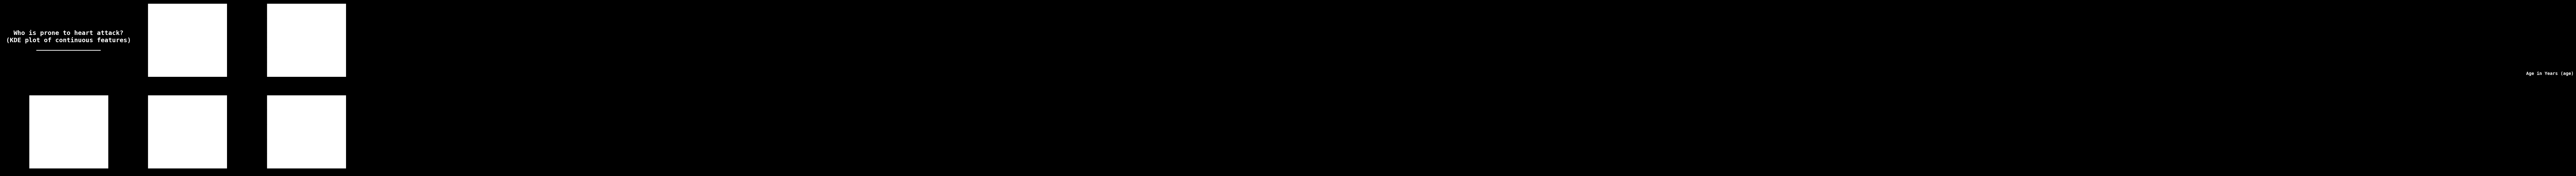

In [44]:
setup('Who is prone to heart attack?\n (KDE plot of continuous features) \n_________________',5)

#Kde plots
plot(ax1,sns.kdeplot,'age',None,30,0.027,'Age in Years (age)')
plot(ax2,sns.kdeplot,'trtbps',None,80,0.014,'Resting Blood Pressure (trtbps)')
plot(ax3,sns.kdeplot,'chol',None,100,0.005,'Serum Cholestoral in mg/df (chol)')
plot(ax4,sns.kdeplot,'thalachh',None,50,0.0125,'Maximum Heart Rate Achieved (thalachh)')
plot(ax5,sns.kdeplot,'oldpeak',None,-2,0.45,'ST Depression Induced by Exercise Relative to Rest (oldpeak)')

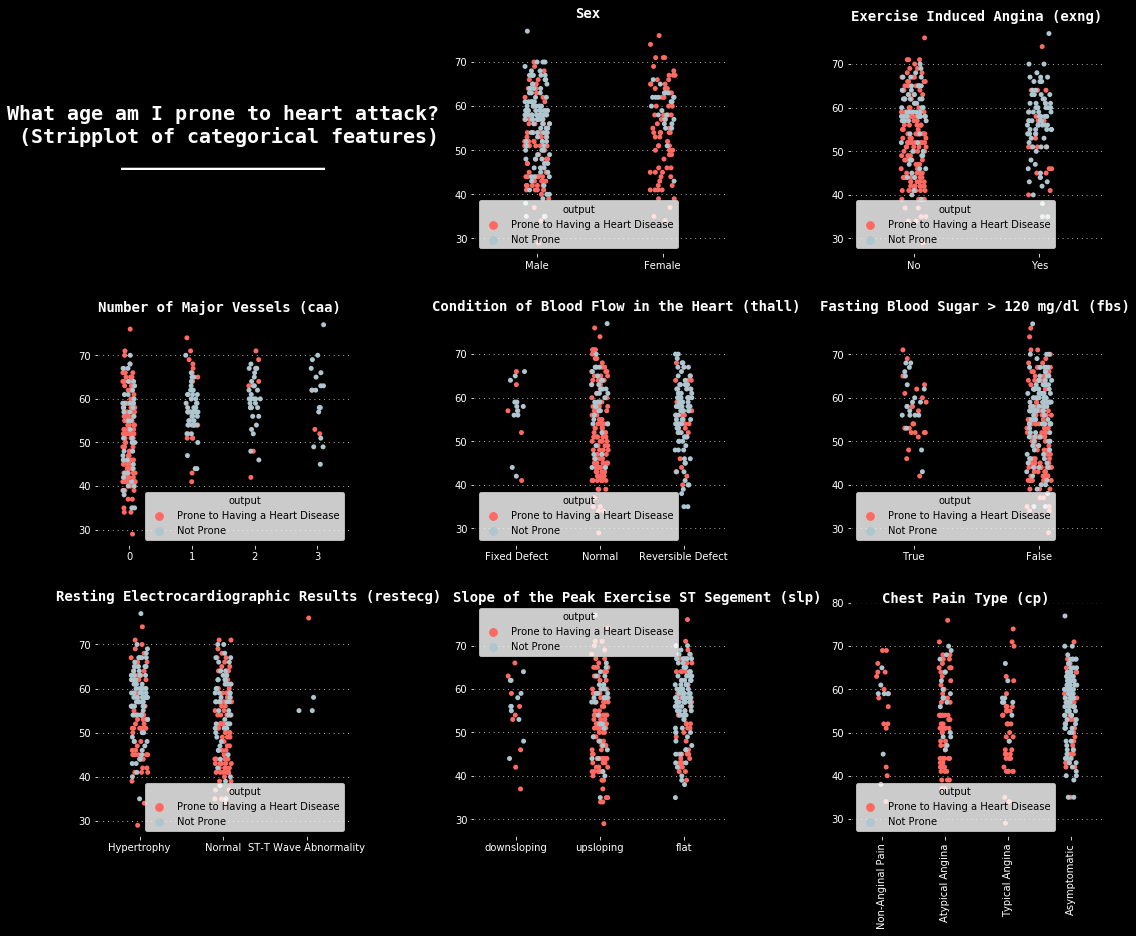

In [45]:
setup('What age am I prone to heart attack?\n (Stripplot of categorical features)\n_________________',8)

#Count plots
plot(ax1,sns.stripplot,'sex','age',0.3,80,'Sex')
plot(ax2,sns.stripplot,'exng','age',-0.5,80, 'Exercise Induced Angina (exng)')
plot(ax3,sns.stripplot,'caa','age',-0.5,80, 'Number of Major Vessels (caa)')
plot(ax4,sns.stripplot,'thall','age',-1,80, 'Condition of Blood Flow in the Heart (thall)')
plot(ax5,sns.stripplot,'fbs','age',-0.75,80,'Fasting Blood Sugar > 120 mg/dl (fbs)')
plot(ax6,sns.stripplot,'restecg','age',-1,80,'Resting Electrocardiographic Results (restecg)')
plot(ax7,sns.stripplot,'slp','age',-0.75,80, 'Slope of the Peak Exercise ST Segement (slp)')
plot(ax8,sns.stripplot,'cp','age',0,80, 'Chest Pain Type (cp)')

#Rotating the xlabels on ax8
ax8.tick_params(axis='x', rotation=90)

In [50]:
#Extracting the features of the testing and training data
X,y = heart.iloc[:,0:-1] , heart.iloc[:,-1]
print(X.head())
print(y.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [74]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
lr = LogisticRegression()
knn2 =  KNeighborsClassifier(n_neighbors=2)
knn3 =  KNeighborsClassifier(n_neighbors=3)
knn4 =  KNeighborsClassifier(n_neighbors=4)
knn5 =  KNeighborsClassifier(n_neighbors=5)
knn6 =  KNeighborsClassifier(n_neighbors=6)
knn7 =  KNeighborsClassifier(n_neighbors=7)
knn8 =  KNeighborsClassifier(n_neighbors=8)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)
svm = SVC()

#list of classifiers
models =     [("Random Forest",rf),
              ("SVM",svm),
              ("Logistic Regression",lr),
              ("2 Nearest Neighbors",knn2),
              ("3 Nearest Neighbors",knn3),
              ("4 Nearest Neighbors",knn4),
              ("5 Nearest Neighbors",knn5),
              ("6 Nearest Neighbors",knn6),
              ("7 Nearest Neighbors",knn7),
              ("8 Nearest Neighbors",knn8),
              ("Classification Tree", dt)]

In [59]:
for model_name, model in models:
    #fit clf to the training set
    model.fit(X_train, y_train)
    #predict the labels of the test set
    y_pred = model.predict(X_test)
    #Evaluate accuracy of the clf on the test set
    print('The accuracy of {:s} is : {:.3f}'.format(model_name, accuracy_score(y_test,y_pred)))
    print('The F1 score of {:s} is : {:.3f}'.format(model_name, f1_score(y_test,y_pred)))
    # Confusion matrix
    print(confusion_matrix(y_test, y_pred))
    #Classification report
    print(classification_report(y_test, y_pred))

The accuracy of Random Forest is : 0.833
The F1 score of Random Forest is : 0.833
[[25  4]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.86      0.81      0.83        31

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

The accuracy of SVM is : 0.850
The F1 score of SVM is : 0.852
[[25  4]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.85        31

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

The accuracy of Logistic Regression is : 0.883
The F1 score of Logistic Regression is : 0.889
[[25  4]
 [ 3 28]]
              precision    recall  f1-score   suppo

C:\Users\PSS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
logistic_regression = models[2][1]

In [84]:
# x = [age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]
def predict_heart_attack(x):
    x2 = scaler.transform([x])
    return logistic_regression.predict(x2)

In [85]:
x2 = [63,1,3,145,233,1,0,150,0,2.3,0,0,1]
y2 = predict_heart_attack(x2)
print(y2)

[1]
